from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

2024-12-09 10:38:28.428308: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 10:38:28.428398: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 10:38:28.428454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-09 10:38:30.017829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# The function that we are going to learn
from math import sin as sine

# Measure performance
import time

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">To teach our ANN sine() we need to show it some examples of sine.</p>  
<p style="font-size:20px">To that end, we generate some examples, y = sine (x)</p>
<p style="font-size:20px">Let's teach our ANN about sine between 0 and 90'</p>



In [3]:
# x = { 0 ... 31 }
x = list (range (0, 32))

# π/2 radians (90 degrees)
pi_2 = 3.1415926 / 2

# The increment
alpha = pi_2 / 32

# x_radians = { 0 ... π/2 }
x_radians = list (map (lambda x: alpha * x, x))

# y = { sine (x0) ... , sine (x31) }
y = list (map (lambda x: sine (x), x_radians))


<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We need to pre-process our data before we train with it.</p>  
<p style="font-size:20px">The arithmetic mean (the average) should be 0.0</p>
<p style="font-size:20px">The data, inputs and outputs, should be such that 0 ≤ |z| ≤ 1 </p>

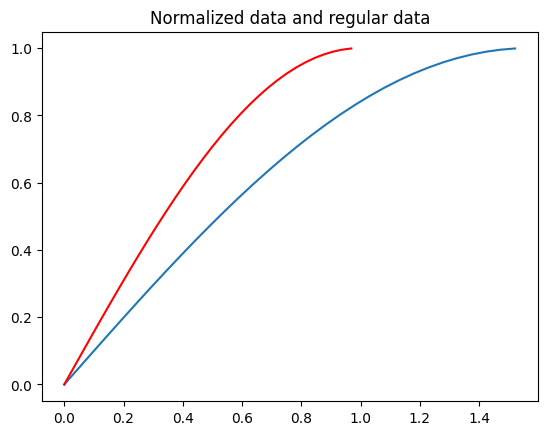

In [4]:
# y = sine (x), the blue curve
plt.plot (x_radians, y)

# Normalize, 0 ≤ x ≤ 1
xN = list (map (lambda x: x / pi_2, x_radians))

# sine is naturally normalized, red curve
plt.plot (xN, y, c="r")

plt.title ("Normalized data and regular data")

plt.show ()

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">We will use Keras to build our ANN.</p>
<p style="font-size:20px">Keras is a fully featured implementation not tied to hardware.</p>
<p style="font-size:20px">Our Roadmap is as follows:</p>


<ul style="font-size:20px">
    <li>Create a model object.</li>
    <li>Specify our ANN's architecture.</li>
    <li>Request Keras to build our ANN.</li>
    <li>Train our ANN with our examples.</li>
</ul>



In [5]:
# Keras container for our model
model = Sequential()

# First layer, one input (x), 5 neurons
model.add(Dense(5, input_dim=1, activation='sigmoid'))

# Second layer, 3 neurons
model.add(Dense(3, activation='sigmoid', name="Miami_Dolphins"))

# One output, y (hopefulle sine (x)!)
model.add(Dense (1, activation='sigmoid'))

# Build our ANN
model.compile (loss='mean_squared_error', optimizer='adam')

model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 Miami_Dolphins (Dense)      (None, 3)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 172ms/step


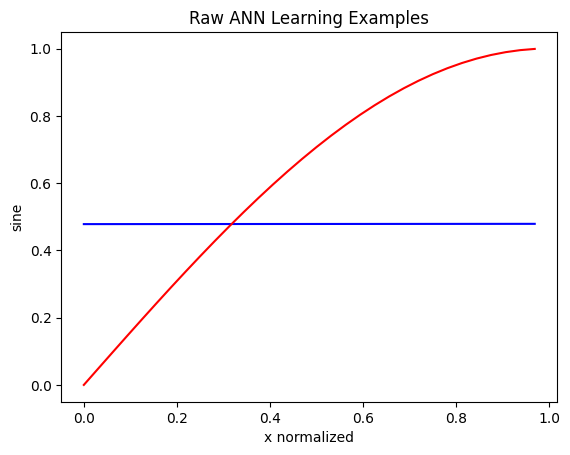

In [6]:
# predict() performs inference with our model
plt.plot (xN, model.predict (xN), c="b")

plt.plot (xN, y, c="r")
plt.xlabel ("x normalized")
plt.ylabel ("sine")
plt.title ("Raw ANN Learning Examples")

plt.show ()

In [7]:
start_time = time.time ()

# Train our model
h = model.fit (xN, y, verbose = False, epochs=3000)

dt = time.time () - start_time
dt

108.13467741012573

<p style="font-size:20px">What happened while training our model?  fit() recorded the history and we can examine the dynamics.</p>

In [8]:
h.history["loss"][2999]

0.0017370727146044374

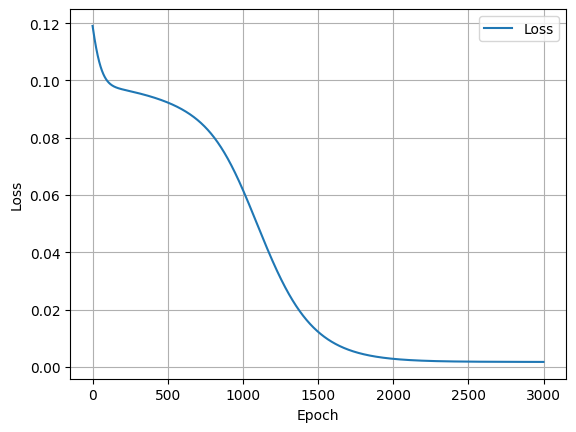

In [9]:
def LossHistory (history):
  plt.plot (history.history['loss'], label='Loss')
  plt.xlabel ('Epoch')
  plt.ylabel ('Loss')
  plt.legend ()
  plt.grid (True)
  plt.show ()

LossHistory (h)

<p style="font-size:20px">_____________________________________________________________________________________</p>
<p style="font-size:20px">How well did we do?</p>
<p style="font-size:20px">We can compare our training data to the ANN's answers.</p>




1/1 [==============================] - 0s 61ms/step


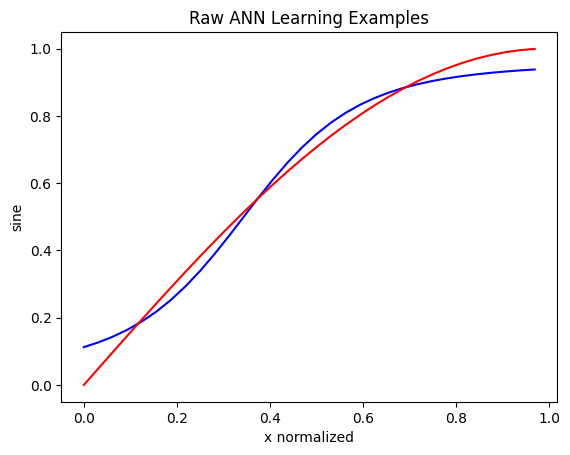

In [10]:
# predict() performs inference with our model
plt.plot (xN, model.predict (xN), c="b")

plt.plot (xN, y, c="r")
plt.xlabel ("x normalized")
plt.ylabel ("sine")
plt.title ("Raw ANN Learning Examples")

plt.show ()

1/1 [==============================] - 0s 55ms/step


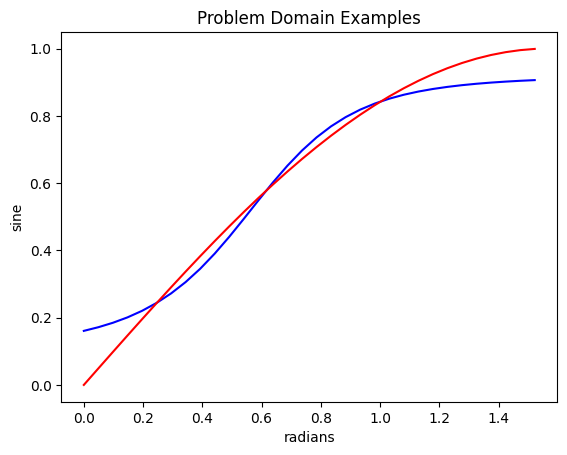

In [11]:
# We're plotting with radians, but we still invoke our ANN with normalized data
plt.plot (x_radians, model.predict (xN), c="b")

plt.plot (x_radians, y, c="r")
plt.xlabel ("radians")
plt.ylabel ("sine")
plt.title ("Problem Domain Examples")
plt.show ()

In [11]:
for layer in model.layers:
    print (layer.get_weights ())

[array([[ 2.7884219,  2.6454039, -0.9058677, -2.1732109,  2.4012733]],
      dtype=float32), array([-1.1967056 , -1.1199061 ,  0.5656395 ,  0.99964136, -1.04503   ],
      dtype=float32)]
[array([[-1.7641653 , -1.5904151 ,  1.1708233 ],
       [-1.9713132 , -0.7938326 ,  1.8257536 ],
       [ 1.2922105 ,  0.8840927 , -0.6363206 ],
       [ 1.5117265 ,  0.92225415, -1.9752847 ],
       [-1.850914  , -1.7050492 ,  1.4688452 ]], dtype=float32), array([ 0.7794082 ,  0.50726455, -0.4032751 ], dtype=float32)]
[array([[-2.464277 ],
       [-2.0582964],
       [ 2.643323 ]], dtype=float32), array([0.6390853], dtype=float32)]


In [12]:
model.get_weights ()

[array([[ 2.7884219,  2.6454039, -0.9058677, -2.1732109,  2.4012733]],
       dtype=float32),
 array([-1.1967056 , -1.1199061 ,  0.5656395 ,  0.99964136, -1.04503   ],
       dtype=float32),
 array([[-1.7641653 , -1.5904151 ,  1.1708233 ],
        [-1.9713132 , -0.7938326 ,  1.8257536 ],
        [ 1.2922105 ,  0.8840927 , -0.6363206 ],
        [ 1.5117265 ,  0.92225415, -1.9752847 ],
        [-1.850914  , -1.7050492 ,  1.4688452 ]], dtype=float32),
 array([ 0.7794082 ,  0.50726455, -0.4032751 ], dtype=float32),
 array([[-2.464277 ],
        [-2.0582964],
        [ 2.643323 ]], dtype=float32),
 array([0.6390853], dtype=float32)]

In [13]:
model.get_layer ("Miami_Dolphins")

In [14]:
z__ = np.random.uniform (-1, 1, 5).reshape (1, 5)

z__.shape

(1, 5)

In [15]:
MyLayer = model.get_layer ("Miami_Dolphins")

MyLayer (z__).numpy ()

array([[0.9070064 , 0.8434476 , 0.14773981]], dtype=float32)

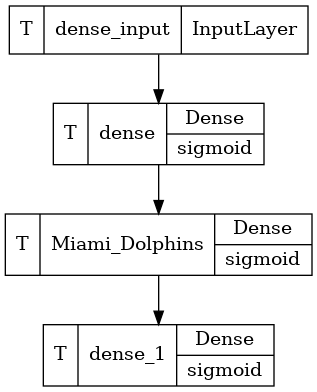

In [16]:
plot_model (model, show_layer_activations=True, show_trainable=True)